# Importing Necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data

In [2]:
df = pd.read_csv('dataset_Electric_vehicles.csv')
df.head(17)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500
5,5YJ3E1EB5J,Snohomish,Bothell,WA,98021,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,1.0,475635324,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,53061051916
6,1N4AZ0CP4D,Snohomish,Everett,WA,98203,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,38.0,253546023,POINT (-122.23019 47.94949),PUGET SOUND ENERGY INC,53061040900
7,1N4AZ0CP0D,Snohomish,Mukilteo,WA,98275,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,21.0,176817364,POINT (-122.29196 47.89908),PUGET SOUND ENERGY INC,53061042001
8,1N4BZ0CP4G,Island,Clinton,WA,98236,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,10.0,475900379,POINT (-122.35803 47.9796),PUGET SOUND ENERGY INC,53029972100
9,KNDJP3AE2G,Skagit,Anacortes,WA,98221,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,40.0,100489049,POINT (-122.61214 48.51748),PUGET SOUND ENERGY INC,53057940301


# Info of dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

# Column names

In [4]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

# Shape of the data set

In [5]:
df.shape

(112634, 17)

# Finding Duplicates

In [6]:
df.duplicated().sum()

0

# Finding Null values

In [7]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

# Filling null values of each column

In [8]:
df['Model'] = df['Model'].fillna('Unknown')
df['Legislative District'] = df['Legislative District'].fillna(0)
df['Vehicle Location'] = df['Vehicle Location'].fillna('Unknown')
df['Electric Utility'] = df['Electric Utility'].fillna(df['Electric Utility'].mode()[0])

# Checking if any values are misspelled

In [9]:
def value_count(dataframe, column_name):
    if column_name in df.columns:
        value_counts = df[column_name].value_counts()
        for value, count in value_counts.items():
            print(f"{value}: {count}")

In [10]:
print(f"Total unique counts of the County column is:{df['County'].nunique()}")
print("")
value_count(df, "County")

Total unique counts of the County column is:165

King: 59000
Snohomish: 12434
Pierce: 8535
Clark: 6689
Thurston: 4126
Kitsap: 3847
Whatcom: 2840
Spokane: 2792
Benton: 1376
Island: 1307
Skagit: 1258
Clallam: 731
San Juan: 721
Jefferson: 699
Chelan: 654
Yakima: 617
Cowlitz: 569
Mason: 547
Lewis: 431
Grays Harbor: 403
Kittitas: 392
Franklin: 365
Grant: 335
Walla Walla: 312
Douglas: 227
Whitman: 177
Klickitat: 175
Okanogan: 149
Pacific: 147
Stevens: 142
Skamania: 139
Asotin: 48
Wahkiakum: 39
Adams: 35
Pend Oreille: 32
Lincoln: 31
Ferry: 27
San Diego: 23
Columbia: 14
Anne Arundel: 9
Montgomery: 9
Los Angeles: 8
Alexandria: 8
Orange: 7
Riverside: 6
District of Columbia: 6
Bexar: 6
Fairfax: 6
Maricopa: 5
Norfolk: 5
Santa Clara: 5
El Paso: 5
Cumberland: 4
Salt Lake: 4
Garfield: 4
New London: 4
Prince George's: 3
Ventura: 3
Loudoun: 3
Pulaski: 3
Kern: 3
Middlesex: 3
Contra Costa: 3
Honolulu: 3
Lake: 3
Chesapeake: 3
Stafford: 3
San Bernardino: 2
Solano: 2
Calvert: 2
Plaquemines: 2
Virginia Beach

In [11]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

# Task 1
### UNIVARIATE ANALYSIS

# Pie chart of Electric Vehicle Type

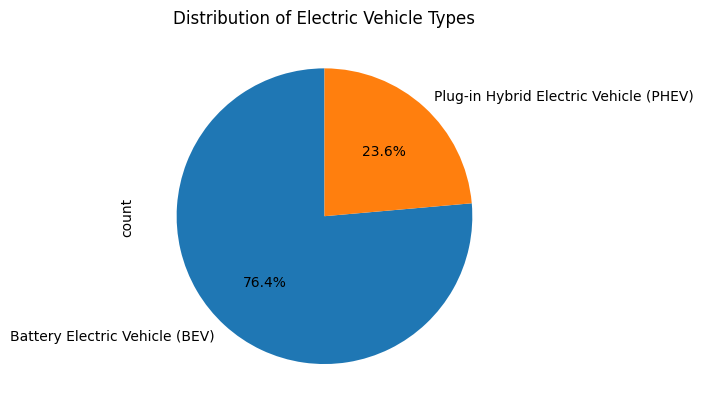

In [12]:
df['Electric Vehicle Type'].value_counts().plot.pie(autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Electric Vehicle Types')
plt.show()

# Boxplot for Legislative District

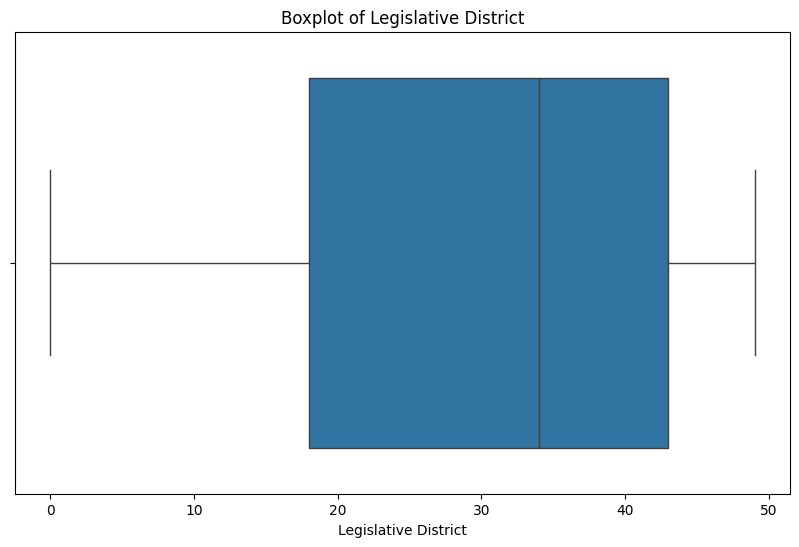

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['Legislative District'], orient='h')
plt.title('Boxplot of Legislative District')
plt.xlabel('Legislative District')
plt.show()

# Distribution of Electric Range

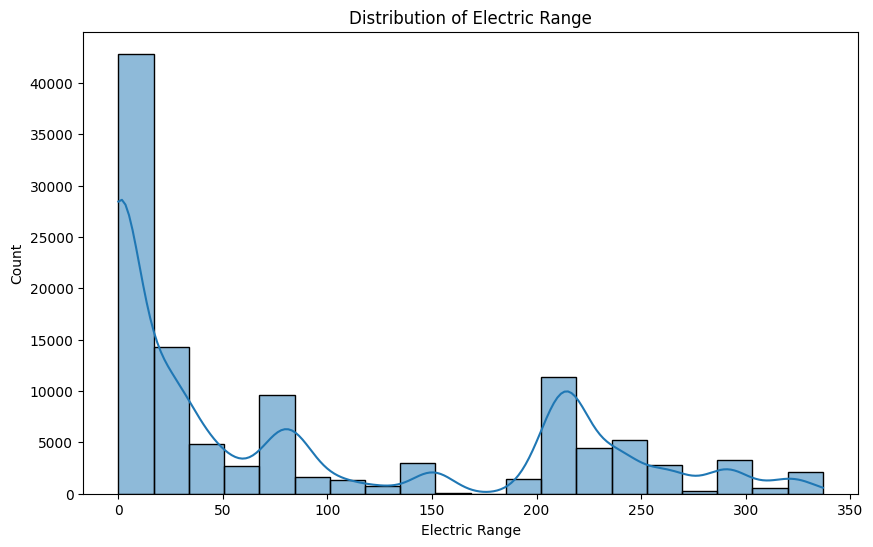

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Electric Range'], bins=20, kde=True)
plt.title('Distribution of Electric Range')
plt.show()

# Count of Electric Vehicle Type

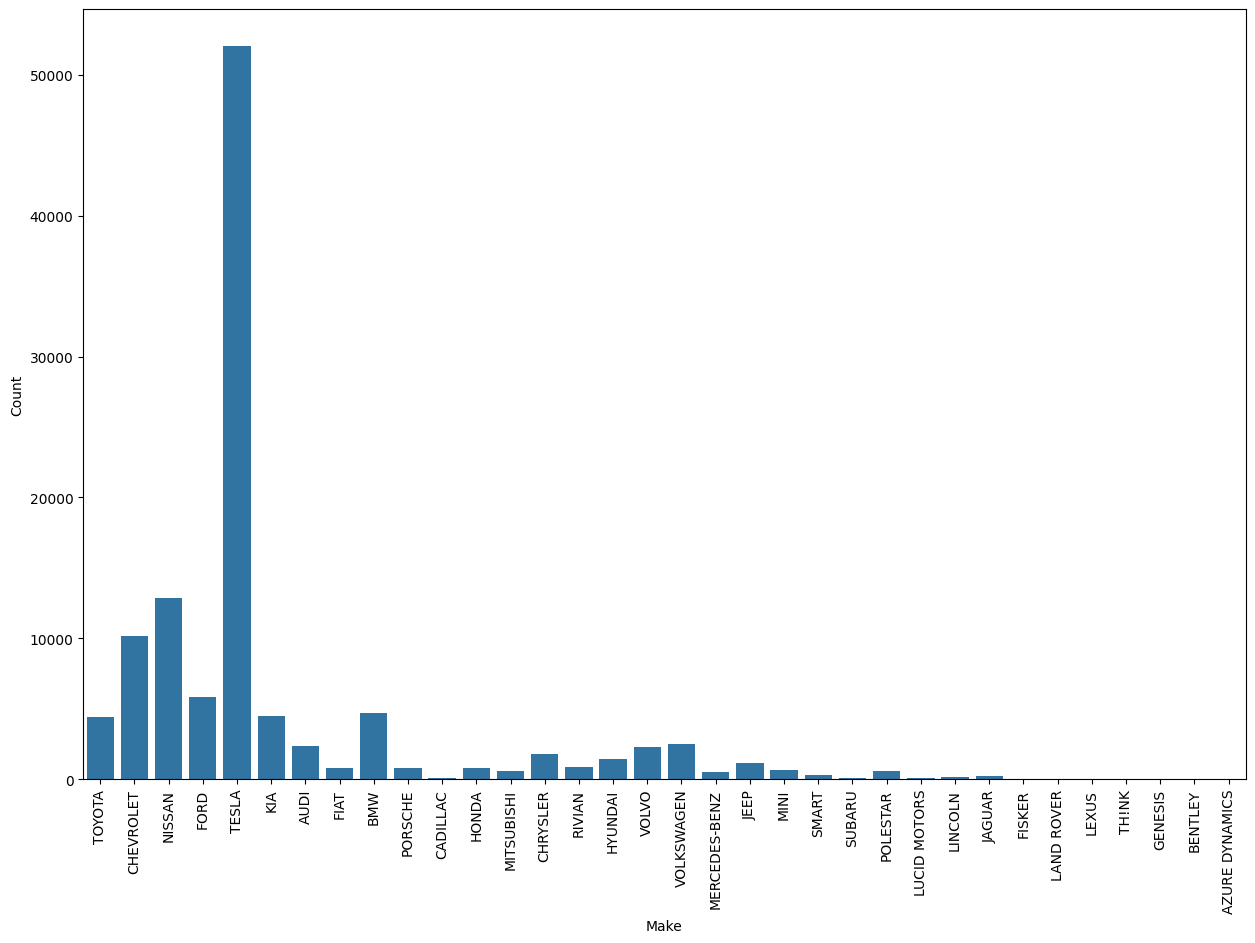

In [15]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='Make')
plt.xticks(rotation=90)
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()

# Electric Range vs Base MSRP

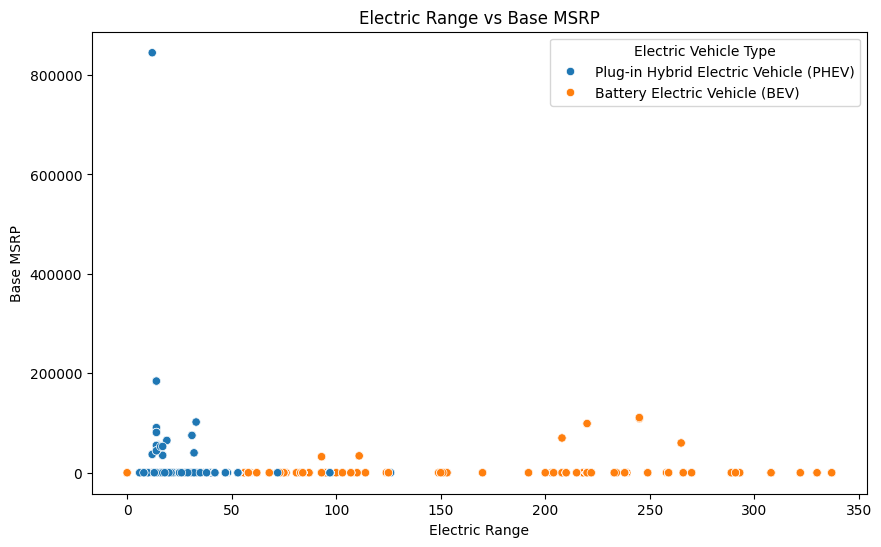

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Electric Range', y='Base MSRP',hue='Electric Vehicle Type', data=df)
plt.title('Electric Range vs Base MSRP')
plt.show()

# Model Year vs Base MSRP

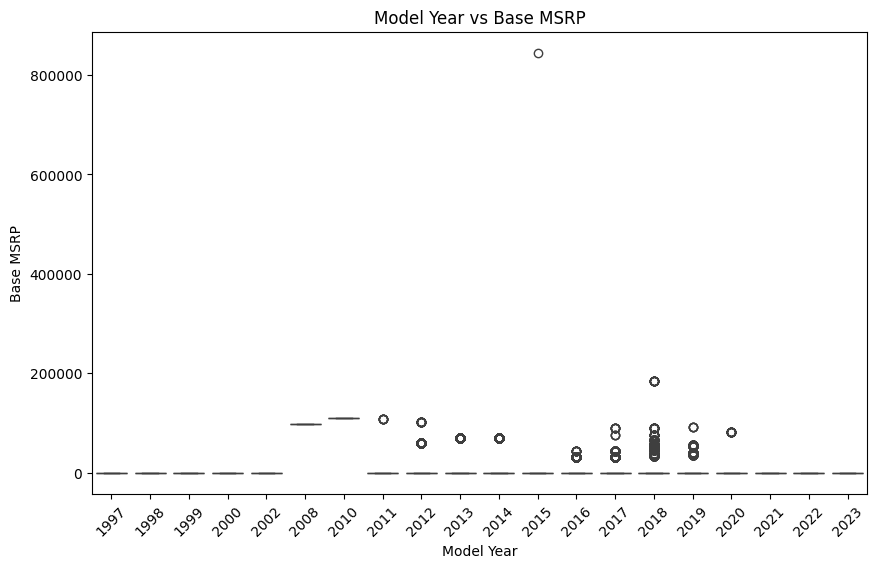

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model Year', y='Base MSRP', data=df)
plt.title('Model Year vs Base MSRP')
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap of numerical variables

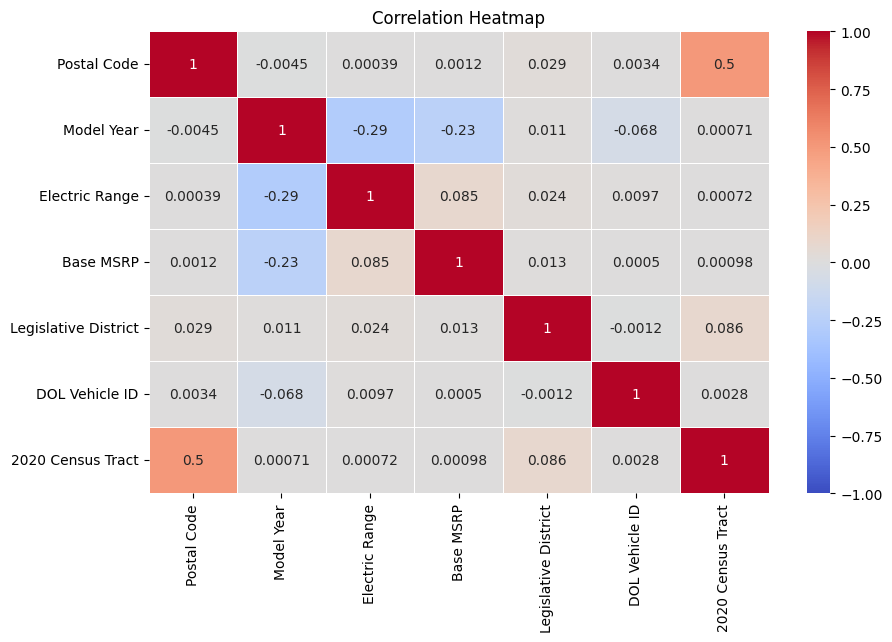

In [18]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin = -1, vmax =1 )
plt.title('Correlation Heatmap')
plt.show()

# Install Plotly
### Use this command to install plotly "!pip install plotly"

In [19]:
import plotly.express as px

In [20]:
import plotly.io as pio
pio.renderers.default = 'iframe'

# Creating a choropleth map using Plotly Express

In [21]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'

ev_count_by_state = df.groupby('State').size().reset_index(name='EV Count')
fig = px.choropleth(
    ev_count_by_state,
    locations='State',
    locationmode='USA-states',
    color='EV Count',
    scope="usa",
    color_continuous_scale="Viridis",
    title="Number of EV Vehicles by State",
    labels={'EV Count': 'Number of EVs'}
)
fig.show()

# Racing Bar Plot to display the animation of EV Make and its count each year.


In [22]:
!pip install bar-chart-race

In [23]:
pip install --upgrade bar_chart_race

Note: you may need to restart the kernel to use updated packages.


In [24]:
import bar_chart_race as bcr
from IPython.display import Image, display

C:\Users\Home\AppData\Local\Temp\ipykernel_28200\50611207.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\home\appdata\local\programs\python\python38\lib\site-packages\bar_chart_race\_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

c:\users\home\appdata\local\programs\python\python38\lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator

MovieWriter imagemagick unavailable; using Pillow instead.


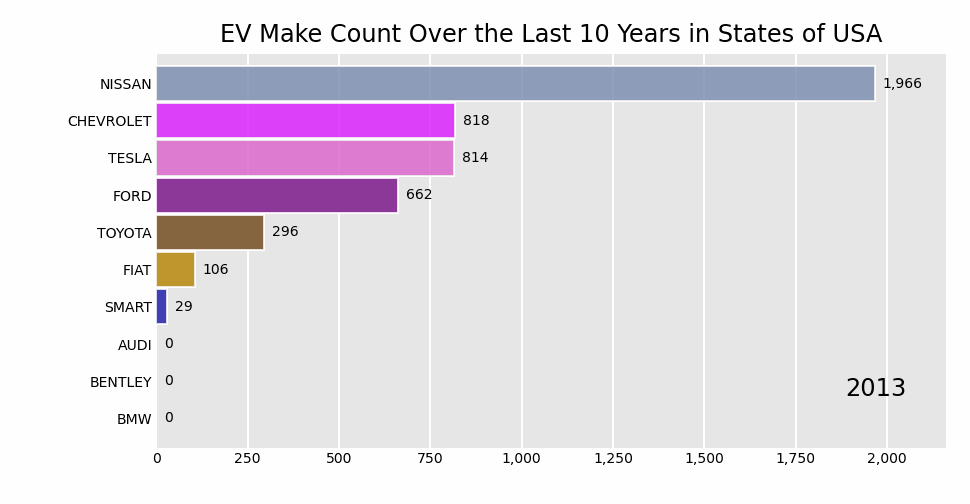

In [25]:
import bar_chart_race as bcr
from IPython.display import Image, display
import pandas as pd

# Assuming 'Model Year' is in numeric format, first convert it if necessary
df['Model Year'] = pd.to_numeric(df['Model Year'], errors='coerce')

# Filter the data for the last 10 years
recent_years = df['Model Year'].max() - 10
df_last_10_years = df[df['Model Year'] >= recent_years]

# Convert 'Model Year' back to string for grouping and visualization
df_last_10_years['Model Year'] = df_last_10_years['Model Year'].astype(str)

# Group the data by 'Model Year' and 'Make' to get the count
grouped_data = df_last_10_years.groupby(['Model Year', 'Make']).size().reset_index(name='Count')

# Pivot the data for the bar chart race
pivoted_data = grouped_data.pivot(index='Model Year', columns='Make', values='Count').fillna(0)

# Create the bar chart race and save it as a .gif
bcr.bar_chart_race(
    df=pivoted_data, 
    filename='EV_make_racing_bar_plot_last_10_years.gif',  # Saves as .gif
    orientation='h', 
    sort='desc', 
    n_bars=10, 
    title='EV Make Count Over the Last 10 Years in States of USA', 
    filter_column_colors=True,  
    period_length=1000
)

# Display the .gif
Image(filename='EV_make_racing_bar_plot_last_10_years.gif')